# Movie Revenue Prediction
***

### Import Packages
***

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis
***

In [2]:
# Load dataset
movie_ds = pd.read_csv("../Movie_Prediction_Analysis/movie_revenue_predictions.csv")
movie_ds.head()

,title,tagline,revenue,budget,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,Avatar,Enter the World of Pandora.,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",961000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released
2,Spectre,A Plan No One Escapes,880674609,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/15,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released
3,The Dark Knight Rises,The Legend Ends,1084939099,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/12,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released
4,John Carter,"Lost in our world, found in another.",284139100,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/12,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released


In [3]:
movie_ds.shape

(4803, 16)

In [4]:
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
title                   4803 non-null object
tagline                 3959 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
overview                4800 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 600.5+ KB


### Check for null values in any column

In [5]:
movie_ds.isnull().any()

title                   False
tagline                  True
revenue                 False
budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
overview                 True
production_companies    False
production_countries    False
release_date             True
runtime                  True
spoken_languages        False
status                  False
dtype: bool

### Drop Features

As some of the columns/features are irrelevant and have a lot of missing values as well and would not contribute to our analysis, therefore we can drop those columns to focus of relevant features for prediction.

In [6]:
movie_ds.drop(['title','tagline','genres','homepage','id','keywords','overview','production_companies','production_countries',
              'release_date', 'spoken_languages'],axis=1,inplace=True)

In [7]:
movie_ds.isnull().any()

revenue              False
budget               False
original_language    False
runtime               True
status               False
dtype: bool

## Data pre-processing
***

### Assign two variables one the independent variable that contains all the features and second the dependent variable that contains the values that need to be predicted

In [8]:
X = movie_ds.iloc[:,1:].values
y = movie_ds.iloc[:, 0].values

### Handle the missing values

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,2:3])
X[:,2:3] = imputer.transform(X[:,2:3])

### Encoding the categorical variable 

In [10]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [1,3])
X = onehotencoder.fit_transform(X).toarray()

### Creating a correlation matrix for the columns

,revenue,budget,runtime
revenue,1.000000,0.730823,0.251093
budget,0.730823,1.000000,0.269851
runtime,0.251093,0.269851,1.000000


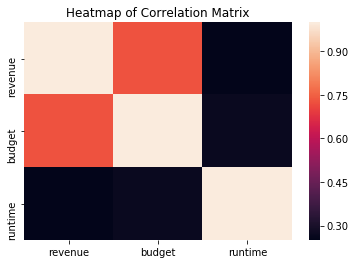

<Figure size 1440x720 with 0 Axes>

In [12]:
 # Create a correlation matrix.
corr = movie_ds.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

plt.figure(figsize=(20,10))

corr

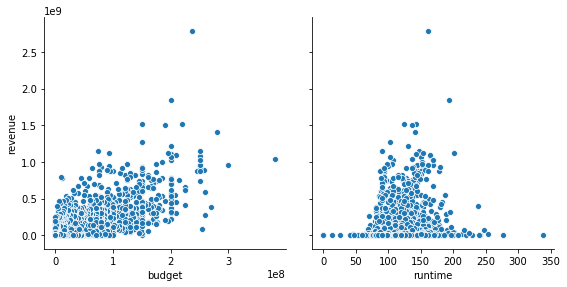

In [13]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(movie_ds, x_vars=['budget', 'runtime'], y_vars='revenue', height=4, aspect=1)

In [17]:
### SCIKIT-LEARN ###

# create X and Y
#feature_cols = ['budget']
X_ind = movie_ds.iloc[:,1:2].values
Y_dep = movie_ds.iloc[:,0:1].values


### Splitting the dataset into training set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ind, Y_dep, test_size = 0.2, random_state = 0)

### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
It takes the following form:
y=β0+β1x 
What does each term represent?

y  is the response
x  is the feature
β0  is the intercept
β1  is the coefficient for x

β0  and  β1  are called the model coefficients
***

In [19]:
## Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
## Predicting the test set result
Y_pred = regressor.predict(X_test)

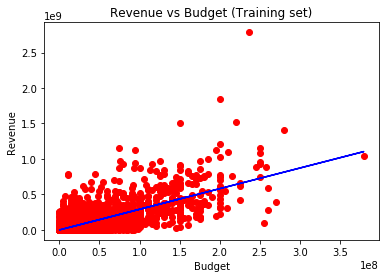

In [21]:
# Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Revenue vs Budget (Training set)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

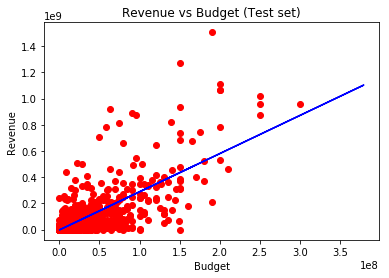

In [22]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Revenue vs Budget (Test set)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### Multiple Linear Regression

In [40]:
X.shape

(4803, 42)

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Predicting the Test set results
y_pred1 = regressor.predict(X_test1)

## Backward Elimination Process to select independepent variables

In [46]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x

In [49]:
SL = 0.05
X_opt = X[:, 0:42]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      10.571
Model:                            OLS   Adj. R-squared:                 10.577
Method:                 Least Squares   F-statistic:                    -1767.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               1.00
Time:                        14:51:18   Log-Likelihood:                -95782.
No. Observations:                4803   AIC:                         1.916e+05
Df Residuals:                    4800   BIC:                         1.916e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.457e+07    7.7e+06     -5.785      0.0